# Testing Functions
This notebook is for debugging the functions and classes created for this project.

In [ ]:
import pandas as pd
import numpy as np
import os

Running notebooks

In [10]:
%run C:\Users\HP\Desktop\Git\University-Research\functions\SVGPR_class.ipynb
%run C:\Users\HP\Desktop\Git\University-Research\functions\SVR_class.ipynb
%run C:\Users\HP\Desktop\Git\University-Research\functions\RF_class.ipynb
%run C:\Users\HP\Desktop\Git\University-Research\functions\MyModel.ipynb

### Creating mock-up data

In [39]:
path_to_data = r"C:\Users\HP\Desktop\Git\University-Research\processed_data\clustered_data_2\all_data.csv"
df = pd.read_csv(path_to_data)
stations = df['st_num'].unique()

# Saving mock-up cluster data
for cluster in ['clusterX', 'clusterY']:
    cluster_stations = np.random.choice(stations, size = 3)
    
    train_stations = cluster_stations[:2]
    cond = df['st_num'].isin(train_stations)
    train = df.loc[cond, ['st_num', 'cluster', 'date', 'max_temp', 'max_hum', 'min_hum', 'avg_ws', 'ET0']]
    
    test_stations = [cluster_stations[2]]
    cond = df['st_num'].isin(test_stations)
    test = df.loc[cond, ['st_num', 'cluster', 'date', 'max_temp', 'max_hum', 'min_hum', 'avg_ws', 'ET0']]
    
    path_to_data = r"C:\Users\HP\Desktop\class_test\processed_data"
    path_to_data = os.path.join(path_to_data, cluster)
    
    file_name = cluster + '_train.csv'
    file_path = os.path.join(path_to_data, file_name)
    train.to_csv(file_path, index = False)

    file_name = cluster + '_test.csv'
    file_path = os.path.join(path_to_data, file_name)
    test.to_csv(file_path, index = False)
    
# Saving unclustered data
cluster_stations = np.random.choice(stations, size = 3)
    
train_stations = cluster_stations[:2]
cond = df['st_num'].isin(train_stations)
train = df.loc[cond, ['st_num', 'date', 'max_temp', 'max_hum', 'min_hum', 'avg_ws', 'ET0']]

test_stations = [cluster_stations[2]]
cond = df['st_num'].isin(test_stations)
test = df.loc[cond, ['st_num', 'date', 'max_temp', 'max_hum', 'min_hum', 'avg_ws', 'ET0']]
    
path_to_data = r"C:\Users\HP\Desktop\class_test\processed_data"

file_name = 'train.csv'
file_path = os.path.join(path_to_data, file_name)
train.to_csv(file_path, index = False)

file_name = 'test.csv'
file_path = os.path.join(path_to_data, file_name)
test.to_csv(file_path, index = False)

In [4]:
def test_model_class(model_class, **kwargs):
    model = model_class(**kwargs)
    
    print('Test 1 - model.fit():')
    
    model.fit(X_train, y_train)
    print('   train_time: {}'.format(model.train_time))
    print('   Model:')
    print(model.model)
    
    print('\n')
    print('Test 2 - model.predict()')
    print('   ', model.predict(X_test))
    
    
    print('\n')
    print('Test 2 - model.get_params()')
    print('   ', model.get_params())

### Class `SVRRegressorRBF`

In [42]:
X_train = np.linspace(0, 10, 50).reshape(-1, 1)
y_train = np.sin(X_train).flatten()
X_test = np.linspace(2, 5, 10).reshape(-1, 1)
y_test = np.sin(X_test).flatten()

In [43]:
test_model_class(SVRRegressorRBF)

Test 1 - model.fit():
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..........................svr__C=1, svr__gamma=0.05; total time=   0.0s
[CV] END ..........................svr__C=1, svr__gamma=0.05; total time=   0.0s
[CV] END ..........................svr__C=1, svr__gamma=0.05; total time=   0.0s
[CV] END ..........................svr__C=1, svr__gamma=0.05; total time=   0.0s
[CV] END ..........................svr__C=1, svr__gamma=0.05; total time=   0.0s
[CV] END ...........................svr__C=1, svr__gamma=0.1; total time=   0.0s
[CV] END ...........................svr__C=1, svr__gamma=0.1; total time=   0.0s
[CV] END ...........................svr__C=1, svr__gamma=0.1; total time=   0.0s
[CV] END ...........................svr__C=1, svr__gamma=0.1; total time=   0.0s
[CV] END ...........................svr__C=1, svr__gamma=0.1; total time=   0.0s
[CV] END ...........................svr__C=1, svr__gamma=0.5; total time=   0.0s
[CV] END .................

### Class `RFRegressor`

In [44]:
X_train = np.linspace(0, 10, 1000).reshape(-1, 1)
y_train = np.sin(X_train).flatten()
X_test = np.linspace(2, 5, 200).reshape(-1, 1)
y_test = np.sin(X_test).flatten()

In [45]:
test_model_class(RFRegressor)

Test 1 - model.fit():
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=50; total time=   1.3s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=0.5, min_samples_leaf=20, n_estimators=300; total time=   0.

[CV] END max_samples=1, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=1, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=1, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=1, min_samples_leaf=20, n_estimators=100; total time=   0.0s
[CV] END max_samples=1, min_samples_leaf=20, n_estimators=300; total time=   0.2s
[CV] END max_samples=1, min_samples_leaf=20, n_estimators=300; total time=   0.2s
[CV] END max_samples=1, min_samples_leaf=20, n_estimators=300; total time=   0.2s
[CV] END max_samples=1, min_samples_leaf=20, n_estimators=300; total time=   0.2s
[CV] END max_samples=1, min_samples_leaf=20, n_estimators=300; total time=   0.2s
[CV] END max_samples=1, min_samples_leaf=100, n_estimators=50; total time=   0.0s
[CV] END max_samples=1, min_samples_leaf=100, n_estimators=50; total time=   0.0s
[CV] END max_samples=1, min_samples_leaf=100, n_estimators=50; total time=   0.0s
[CV] END max_sam

### Class `SVGPRegressorRBF`

In [13]:
n_train = 1000
X_train = np.linspace(0, 10, n_train).reshape(-1, 1)
y_train = np.sin(X_train).flatten() + 0.3*np.random.randn(n_train)
X_test = np.linspace(2, 5, 10).reshape(-1, 1)
y_test = np.sin(X_test).flatten()

In [14]:
test_model_class(SVGPRegressorRBF)

Test 1 - model.fit():
   train_time: 29.350432872772217
   Model:


Test 2 - model.predict()
    [ 0.89401185  0.68434287  0.4017812   0.08469551 -0.22825285 -0.50445727
 -0.72053889 -0.86203056 -0.92084643 -0.89276793]


Test 2 - model.get_params()
    {'kernel_var': 0.8223181814647418, 'kernel_len': '0.5214846077839776', 'likelihood_var': 0.08819709496749506}


### Class `MyModel`

#### Case 1
Creating a new model using clustered data.

1. Creating model

In [15]:
model_name = 'clusterX'
save_path = r"C:\Users\HP\Desktop\class_test\models\combo_1"
data_path = r"C:\Users\HP\Desktop\class_test\processed_data"
cluster_name = 'clusterX'

# Clearing old model data
for file in os.listdir(save_path):
    file_path = os.path.join(save_path, file)
    os.remove(file_path)
    
# Creating MyModel object
m = MyModel(feature_combo = 1,
            model_name = model_name,
            save_path = save_path,
            data_path = data_path,
            cluster_name = cluster_name)

Model not found at C:\Users\HP\Desktop\class_test\models\combo_1\clusterX.joblib
MyModel object created without model


2. Loading train/test data

In [16]:
# Loading train and test data
train, test = m.get_train_test()
X_train, X_test, y_train, y_test = m.get_Xy()

3. Creating model and adding it to `MyModel` using `m.add_model()`

In [17]:
# model = SVRRegressorRBF()
# model.fit(X_train, y_train, C = [1, 10], gamma = [0.1, 0.01])

# model = RFRegressor()
# model.fit(X_train, y_train, n_estimators = [100, 200], min_samples_leaf = [10, 50], max_samples=[0.75])

model = SVGPRegressorRBF()
model.fit(X_train, y_train, M=50, minibatch_size=50, iterations=5000)

In [18]:
m.add_model(model, model.train_time)

print('Model: ', m.model)
print('Train time:', m.train_time)

Model:  <__main__.SVGPRegressorRBF object at 0x000002227AC1AFD0>
Train time: 7.74869179725647


4. Computing model evaluation metrics

In [19]:
m.get_scores(predict = True)

Train scores:
MAE = 0.300
RMSE = 0.384
R2 = 0.955
WI = 0.904


Test scores:
MAE = 0.416
RMSE = 0.554
R2 = 0.893
WI = 0.861


5. Plotting predictions vs measured values

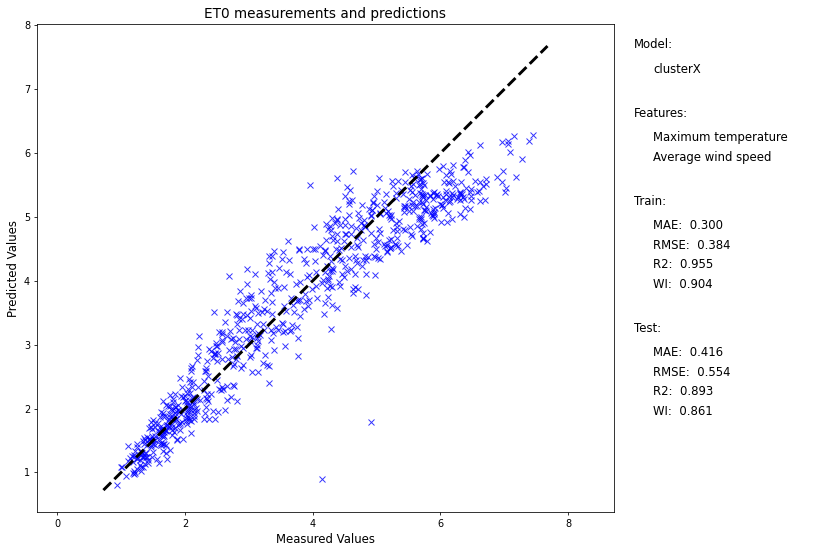

In [20]:
title = 'ET0 measurements and predictions'
m.plot_predictions(title, alpha = 0.8, show_scores = True, dpi = 70)
plt.show()

6. Plotting an ET0 time series

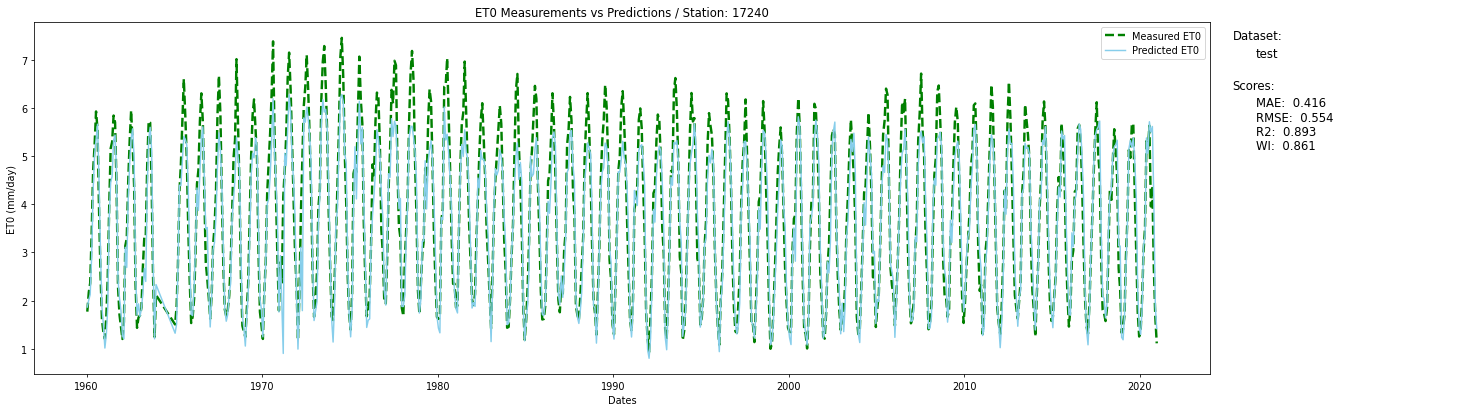

In [29]:
m.plot_station_series(st_num = None, which = 'test')
plt.show()

7. Saving model

In [30]:
m.save_model()

8. Saving model parameters

In [31]:
m.save_params()

9. Saving evaluation metrics

In [32]:
m.save_scores()

#### Case 2
Adding a new model to the same combination folder

1. Creating model

In [33]:
model_name = 'clusterY'
save_path = r"C:\Users\HP\Desktop\class_test\models\combo_1"
data_path = r"C:\Users\HP\Desktop\class_test\processed_data"
cluster_name = 'clusterY'
    
# Creating MyModel object
m = MyModel(feature_combo = 1,
            model_name = model_name,
            save_path = save_path,
            data_path = data_path,
            cluster_name = cluster_name)

Model not found at C:\Users\HP\Desktop\class_test\models\combo_1\clusterY.joblib
MyModel object created without model


2. Loading train/test data

In [34]:
# Loading train and test data
train, test = m.get_train_test()
X_train, X_test, y_train, y_test = m.get_Xy()

3. Creating model and adding it to `MyModel` using `m.add_model()`

In [60]:
# model = SVRRegressorRBF()
# model.fit(X_train, y_train, C = [1, 10], gamma = [0.1, 0.01])

# model = RFRegressor()
# model.fit(X_train, y_train, n_estimators = [100, 200], min_samples_leaf = [10, 50], max_samples=[0.75])

model = SVGPRegressorRBF()
model.fit(X_train, y_train, M=100, minibatch_size=100, iterations=10000)

In [61]:
m.add_model(model, model.train_time)

print('Model: ', m.model)
print('Train time:', m.train_time)

Model:  <__main__.SVGPRegressorRBF object at 0x0000022201B4FD90>
Train time: 30.888159036636353


4. Computing model evaluation metrics

In [62]:
m.get_scores(predict = True)

Train scores:
MAE = 0.286
RMSE = 0.364
R2 = 0.956
WI = 0.906


Test scores:
MAE = 1.010
RMSE = 1.432
R2 = 0.080
WI = 0.622


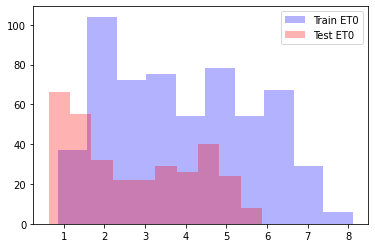

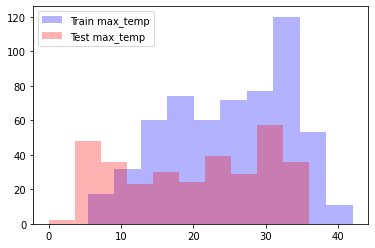

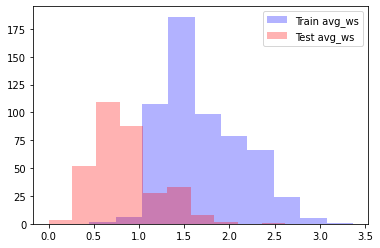

In [72]:
plt.hist(y_train, color='blue', alpha=0.3, label='Train ET0')
plt.hist(y_test, color='red', alpha=0.3, label='Test ET0')
plt.legend()
plt.show()

plt.hist(X_train[:, 0], color='blue', alpha=0.3, label='Train max_temp')
plt.hist(X_test[:, 0], color='red', alpha=0.3, label='Test max_temp')
plt.legend()
plt.show()

plt.hist(X_train[:, 1], color='blue', alpha=0.3, label='Train avg_ws')
plt.hist(X_test[:, 1], color='red', alpha=0.3, label='Test avg_ws')
plt.legend()
plt.show()

5. Plotting predictions vs measured values

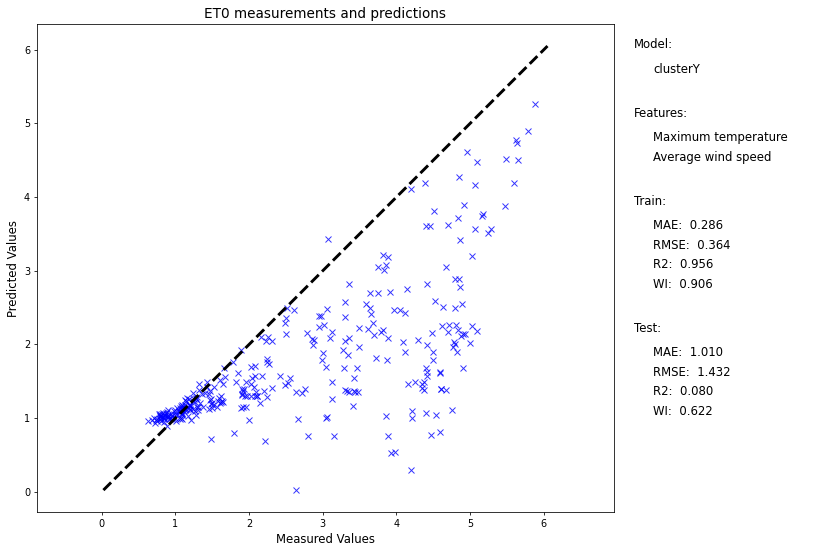

In [63]:
title = 'ET0 measurements and predictions'
m.plot_predictions(title, alpha = 0.8, show_scores = True, dpi = 70)
plt.show()

6. Plotting an ET0 time series

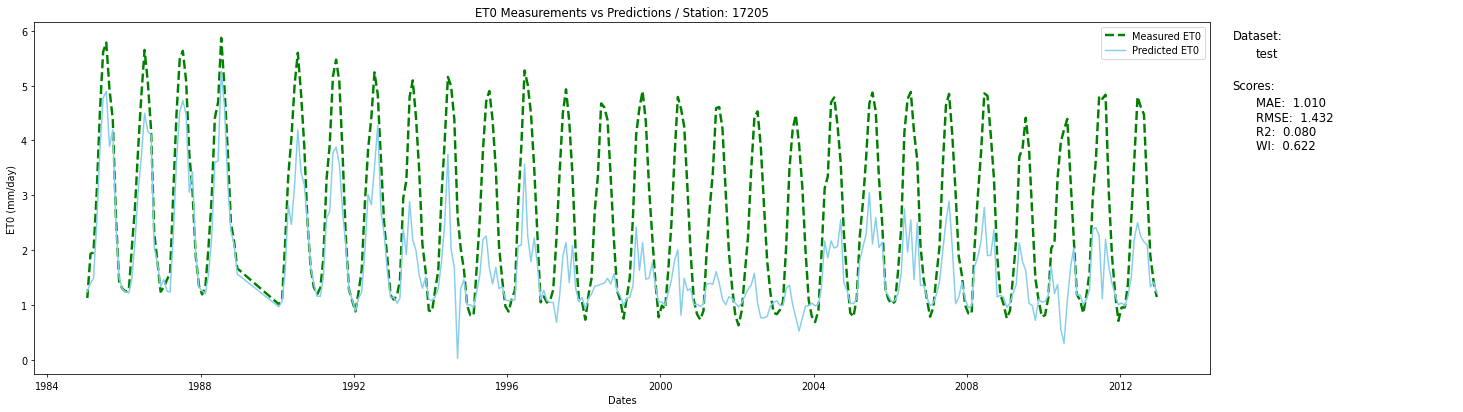

In [68]:
m.plot_station_series(st_num = None, which = 'test')
plt.show()

7. Saving model

In [73]:
m.save_model()

8. Saving model parameters

In [74]:
m.save_params()

9. Saving evaluation metrics

In [75]:
m.save_scores()

10. Plotting map


In [76]:
map_object = m.plot_map()

#### Case 3
Loading previously created models

In [77]:
model_name = 'clusterY'
save_path = r"C:\Users\HP\Desktop\class_test\models\combo_1"
data_path = r"C:\Users\HP\Desktop\class_test\processed_data"
cluster_name = 'clusterY'
    
# Creating MyModel object
m = MyModel(model_name = model_name,
            save_path = save_path,
            data_path = data_path,
            cluster_name = cluster_name
           )

clusterY model loaded from C:\Users\HP\Desktop\class_test\models\combo_1


2. Computing model evaluation metrics

In [78]:
m.get_scores(predict = False)

Train scores:
MAE = 0.286
RMSE = 0.364
R2 = 0.956
WI = 0.906


Test scores:
MAE = 1.010
RMSE = 1.432
R2 = 0.080
WI = 0.622


3. Plotting predictions vs measured values

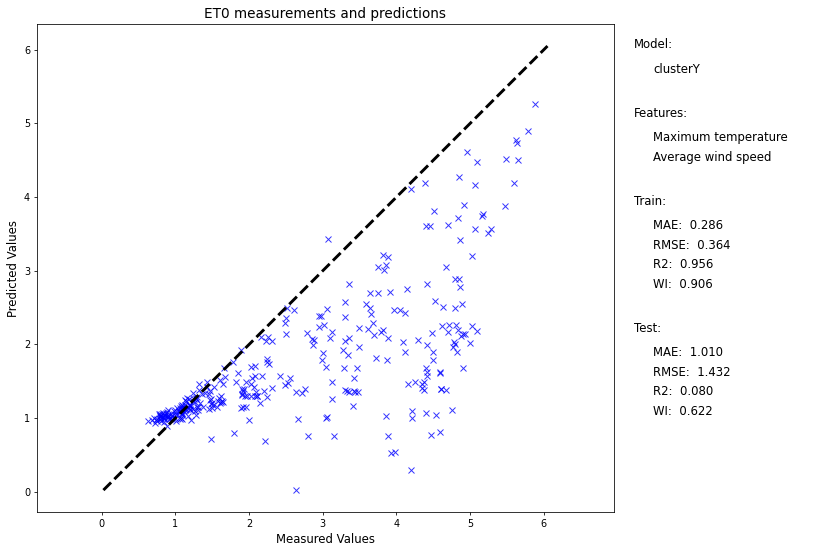

In [79]:
title = 'ET0 measurements and predictions'
m.plot_predictions(title, alpha = 0.8, show_scores = True, dpi = 70)
plt.show()

5. Plotting an ET0 time series

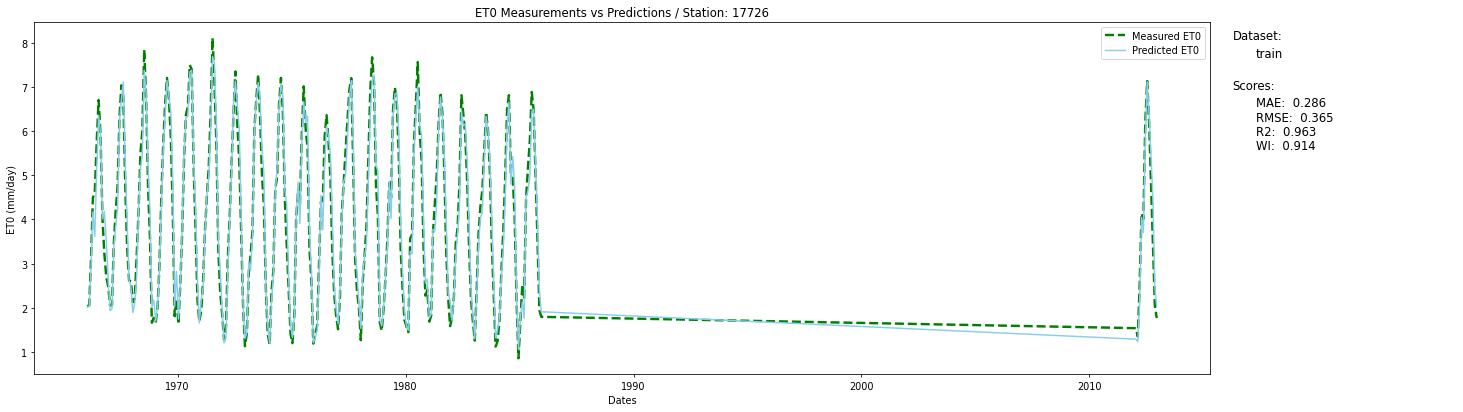

In [80]:
m.plot_station_series(st_num = None, which = 'train')
plt.show()

6. Plot map

In [81]:
map_object = m.plot_map()

#### Case 4
Creating a new model without clusters

### Wrapper class

In [82]:
%run C:\Users\HP\Desktop\Git\University-Research\functions\MyModel.ipynb

In [83]:
%run C:\Users\HP\Desktop\Git\University-Research\functions\MasterModel.ipynb

In [84]:
save_path = r"C:\Users\HP\Desktop\class_test\models\combo_1"
data_path = r"C:\Users\HP\Desktop\class_test\processed_data"

# Clearing old model data
for file in os.listdir(save_path):
    file_path = os.path.join(save_path, file)
    os.remove(file_path)


**SVR**

In [76]:
regressor = SVRRegressorRBF
feature_combo = 1
cluster_names = ['clusterX', 'clusterY']
fit_params = {'C': [1, 10], 'gamma': [0.1, 0.01], 'cv': 4}

master = MasterModel(regressor = regressor,
                     feature_combo = feature_combo,
                     save_path = save_path,
                     data_path = data_path,
                     cluster_names = cluster_names,
                     fit_params = fit_params
                    )

**RF**

In [77]:
regressor = RFRegressor
feature_combo = 1
cluster_names = ['clusterX', 'clusterY']
fit_params = {'n_estimators': [50, 100, 300],
              'min_samples_leaf': [20, 100, 200], 
              'max_samples': [0.5, 0.75, 1]
             }

master = MasterModel(regressor = regressor,
                     feature_combo = feature_combo,
                     save_path = save_path,
                     data_path = data_path,
                     cluster_names = cluster_names,
                     fit_params = fit_params
                    )

**SVGPR**

In [87]:
regressor = SVGPRegressorRBF
feature_combo = 1
cluster_names = ['clusterX', 'clusterY']
fit_params = {'M': 50, 'minibatch_size': 50, 'iterations': 5000}

master = MasterModel(regressor = regressor,
                     feature_combo = feature_combo,
                     save_path = save_path,
                     data_path = data_path,
                     cluster_names = cluster_names,
                     fit_params = fit_params
                    )

In [88]:
master.fit_clusters()



--------------------------------------------------
Model not found at C:\Users\HP\Desktop\class_test\models\combo_1\clusterX.joblib
MyModel object created without model



Cluster: clusterX
Train scores:
MAE = 0.345
RMSE = 0.411
R2 = 0.948
WI = 0.889


Test scores:
MAE = 0.346
RMSE = 0.437
R2 = 0.933
WI = 0.884


--------------------------------------------------
Model not found at C:\Users\HP\Desktop\class_test\models\combo_1\clusterY.joblib
MyModel object created without model



Cluster: clusterY
Train scores:
MAE = 0.326
RMSE = 0.422
R2 = 0.941
WI = 0.893


Test scores:
MAE = 0.826
RMSE = 1.124
R2 = 0.433
WI = 0.691


#### Loading model

In [89]:
save_path = r"C:\Users\HP\Desktop\class_test\models\combo_1"
data_path = r"C:\Users\HP\Desktop\class_test\processed_data"

master = MasterModel(save_path = save_path,
                     data_path = data_path)
m = master.load_cluster_model('clusterY')

clusterY model loaded from C:\Users\HP\Desktop\class_test\models\combo_1


In [90]:
tt = m.plot_map()

<AxesSubplot:title={'center':'Plot'}, xlabel='Measured Values', ylabel='Predicted Values'>

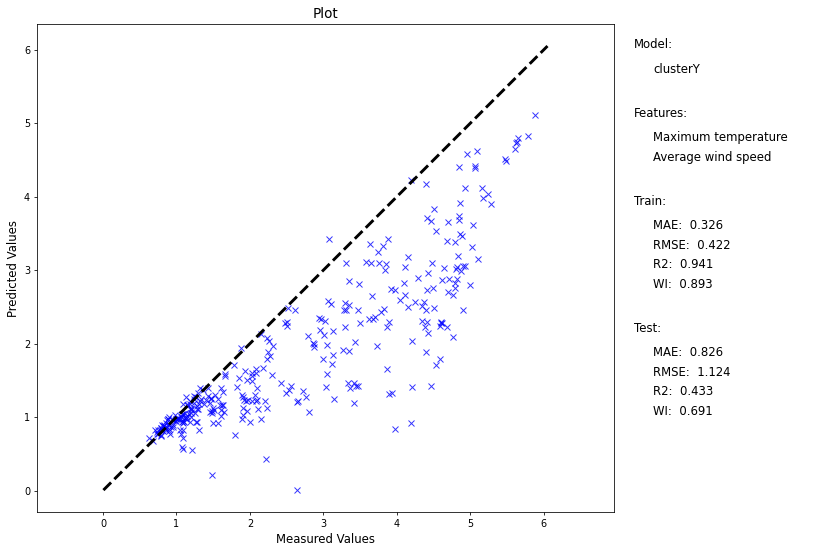

In [91]:
m.plot_predictions(title = 'Plot')

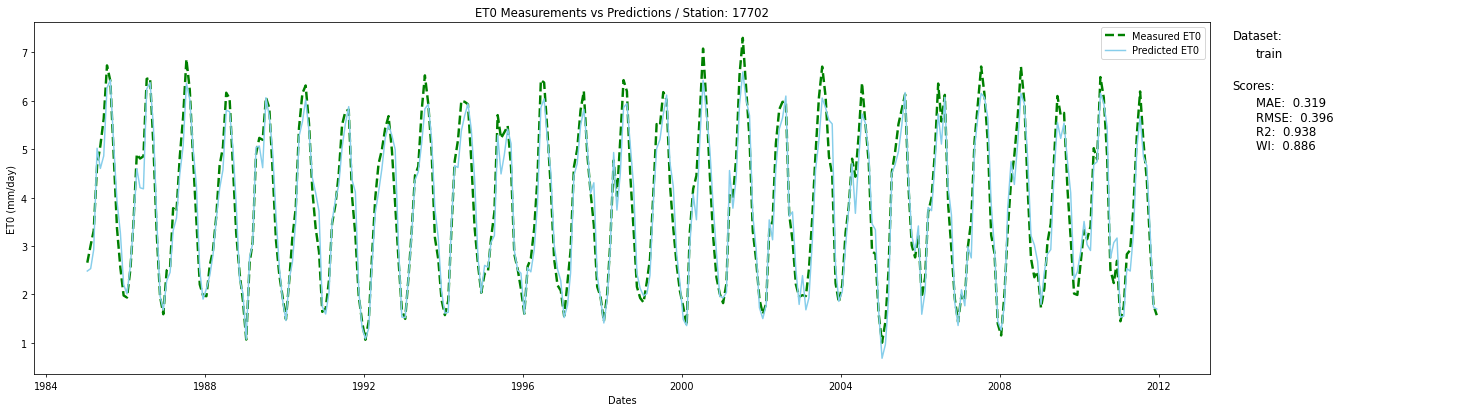

In [92]:
m.plot_station_series(which='train')
plt.show()